### This script contains the following:

#### 1. Importing Libraries
#### 2. Importing Data
#### 3. Data Wrangling and Cleaning
#### 4. Exploring Data Visually
#### 5. Hypotheses
#### 6. Reshaping Variables into NumPy Arrays
#### 7. Splitting Data into 2 Sets
#### 8. Regression Analysis
- 9. Regression Plots

#### 10. Model Statistics Interpretation
#### 11. Model Performance Statistics
#### 12. Compare Predicted and Actual Values
#### 13. Thoughts
#### Bonus: Performance Improvement After Making Data Set More Recent (2006 - 2016 only)

# Importing Libraries

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

# 2) Importing Data

In [35]:
# Creating a path variable
path = r'C:\Users\Aaron\CareerFoundry\Achievement 6'

In [36]:
# Importing most recent dataset
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'salaries_UPDATED.csv'), index_col = False)

In [37]:
# Checking the dataset
df.head()

,Unnamed: 0,salary,name,total_value,pos,length,years,avg_annual,team,city,state,country
0,0,6500000,Giancarlo Stanton,325000000,RF,13,2015,25000000,MIA,Miami,Florida,USA
1,1,21943026,Miguel Cabrera,292000000,1B,10,2014,29200000,DET,Detroit,Michigan,USA
2,2,22000000,Miguel Cabrera,292000000,1B,10,2014,29200000,DET,Detroit,Michigan,USA
3,3,28000000,Alex Rodriguez,275000000,DH,10,2008,27500000,NYY,Bronx,New York,USA
4,4,33000000,Alex Rodriguez,275000000,DH,10,2008,27500000,NYY,Bronx,New York,USA


In [38]:
# Understanding our data
df.shape

(22705, 12)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22705 entries, 0 to 22704
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   22705 non-null  int64 
 1   salary       22705 non-null  int64 
 2   name         22705 non-null  object
 3   total_value  22705 non-null  int64 
 4   pos          22705 non-null  object
 5   length       22705 non-null  int64 
 6   years        22705 non-null  int64 
 7   avg_annual   22705 non-null  int64 
 8   team         22705 non-null  object
 9   city         22705 non-null  object
 10  state        22705 non-null  object
 11  country      22705 non-null  object
dtypes: int64(6), object(6)
memory usage: 2.1+ MB


# 3) Data Wrangling

#### Removing 'Unnamed: 0' Column

In [40]:
df = df.drop(columns = 'Unnamed: 0')

In [41]:
# Checking our work
df.head()

,salary,name,total_value,pos,length,years,avg_annual,team,city,state,country
0,6500000,Giancarlo Stanton,325000000,RF,13,2015,25000000,MIA,Miami,Florida,USA
1,21943026,Miguel Cabrera,292000000,1B,10,2014,29200000,DET,Detroit,Michigan,USA
2,22000000,Miguel Cabrera,292000000,1B,10,2014,29200000,DET,Detroit,Michigan,USA
3,28000000,Alex Rodriguez,275000000,DH,10,2008,27500000,NYY,Bronx,New York,USA
4,33000000,Alex Rodriguez,275000000,DH,10,2008,27500000,NYY,Bronx,New York,USA


#### Renaming 'years' to 'year_start'

In [43]:
df.rename(columns = {'years':'year_start'}, inplace = True)

In [44]:
# Checking our work
df.head()

,salary,name,total_value,pos,length,year_start,avg_annual,team,city,state,country
0,6500000,Giancarlo Stanton,325000000,RF,13,2015,25000000,MIA,Miami,Florida,USA
1,21943026,Miguel Cabrera,292000000,1B,10,2014,29200000,DET,Detroit,Michigan,USA
2,22000000,Miguel Cabrera,292000000,1B,10,2014,29200000,DET,Detroit,Michigan,USA
3,28000000,Alex Rodriguez,275000000,DH,10,2008,27500000,NYY,Bronx,New York,USA
4,33000000,Alex Rodriguez,275000000,DH,10,2008,27500000,NYY,Bronx,New York,USA


# 3) Data Cleaning

#### Check for Missing Values

In [45]:
df.isnull().sum()

salary         0
name           0
total_value    0
pos            0
length         0
year_start     0
avg_annual     0
team           0
city           0
state          0
country        0
dtype: int64

#### Duplicates Check

In [46]:
dups = df.duplicated()

In [47]:
dups.shape

(22705,)

No duplicates!

# 4) Explore Data Visually

### 1. Length vs. Avg. Annual

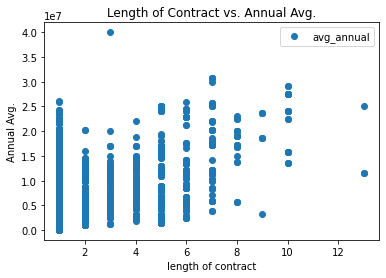

In [48]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'length', y='avg_annual',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Length of Contract vs. Annual Avg.')  
plt.xlabel('length of contract')  
plt.ylabel('Annual Avg.')  
plt.show()

### 2. Length vs. Total Value

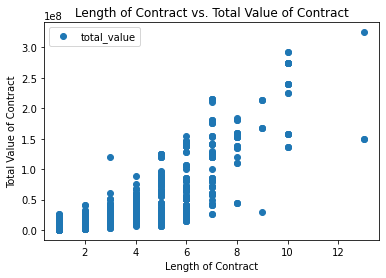

In [62]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'length', y='total_value',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Length of Contract vs. Total Value of Contract')  
plt.xlabel('Length of Contract')  
plt.ylabel('Total Value of Contract')  
plt.show()

# 5) Hypotheses

#### Our three  hypotheses listed from an earlier task:
1. If a player is a pitcher, then they're more likely to receive larger contracts.
2. If a player wants to get paid more in total, then they should opt for a long term contract.
3. If a player wants to get paid more upfront, then they should opt for a short term contract.

# 6) Reshape the Variables into NumPy Arrays

### 1. Length vs. Avg. Annual

In [63]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X1 = df['length'].values.reshape(-1,1)
y1 = df['avg_annual'].values.reshape(-1,1)

In [64]:
# Checking our work
X1

array([[13],
       [10],
       [10],
       ...,
       [ 1],
       [ 1],
       [ 1]], dtype=int64)

In [65]:
# Checking our work
y1

array([[25000000],
       [29200000],
       [29200000],
       ...,
       [   62500],
       [   62500],
       [   62500]], dtype=int64)

### 3. Length vs. Total Value

In [90]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X2 = df['length'].values.reshape(-1,1)
y2 = df['total_value'].values.reshape(-1,1)

In [91]:
# Check our work
X2

array([[13],
       [10],
       [10],
       ...,
       [ 1],
       [ 1],
       [ 1]], dtype=int64)

In [92]:
# Check our work
y2

array([[325000000],
       [292000000],
       [292000000],
       ...,
       [    62500],
       [    62500],
       [    62500]], dtype=int64)

# 7) Split the Data into 2 Sets:  training and test

### 1. Length vs. Avg. Annual

In [70]:
# Split data into a training set and a test set.

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

### 2. Length vs. Total Value

In [93]:
# Split data into a training set and a test set.

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

# 8) Regression Analysis

### 1. Length vs. Avg. Annual

In [76]:
# Create a regression object.

regression_1 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [77]:
# Fit the regression object onto the training set.

regression_1.fit(X1_train, y1_train)

LinearRegression()

In [78]:
# Predict the values of y1 using X1.

y1_predicted = regression.predict(X1_test)

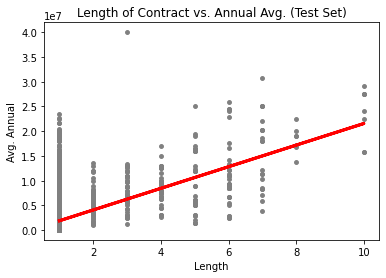

In [79]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X1_test, y1_test, color='gray', s = 15)
plot_test.plot(X1_test, y1_predicted, color='red', linewidth =3)
plot_test.title('Length of Contract vs. Annual Avg. (Test Set)')
plot_test.xlabel('Length')
plot_test.ylabel('Avg. Annual')
plot_test.show()

### 10) Interpretation of Line and its Fit on the Data

This model doesn't do a great job of explaining the relationship between the Length variable and the Annual Average variable. The data points are scattered all over the chart with barely any landing right on the line.

### 2. Length vs. Total Value

In [94]:
# Create a regression object.

regression_2 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [95]:
# Fit the regression object onto the training set.

regression_2.fit(X2_train, y2_train)

LinearRegression()

In [96]:
# Predict the values of y1 using X1.

y2_predicted = regression.predict(X2_test)

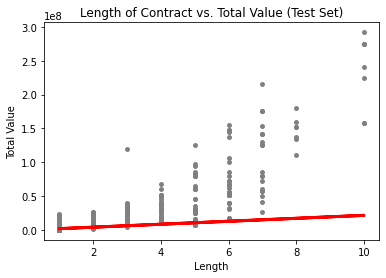

In [97]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X2_test, y2_test, color='gray', s = 15)
plot_test.plot(X2_test, y2_predicted, color='red', linewidth =3)
plot_test.title('Length of Contract vs. Total Value (Test Set)')
plot_test.xlabel('Length')
plot_test.ylabel('Total Value')
plot_test.show()

### 10) Interpretation of Line and its Fit on the Data

Although the data seems to be moving from bottom left to top right direction, it's interesting to see that the line of best fit doesn't have that high of a slope.

# 11) Model Performance Statistics

### 1. Length vs. Avg. Annual

In [84]:
# Create objects that contain the model summary statistics.

rmse_1 = mean_squared_error(y1_test, y1_predicted) # This is the mean squared error
r2_1 = r2_score(y1_test, y1_predicted) # This is the R2 score. 

In [85]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression_1.coef_)
print('Mean squared error: ', rmse_1)
print('R2 score: ', r2_1)

Slope: [[2182658.25624669]]
Mean squared error:  9342287663562.54
R2 score:  0.2242832482073257


### 2. Length vs. Total Value

In [98]:
# Create objects that contain the model summary statistics.

rmse_2 = mean_squared_error(y2_test, y2_predicted) # This is the mean squared error
r2_2 = r2_score(y2_test, y2_predicted) # This is the R2 score. 

In [99]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression_2.coef_)
print('Mean squared error: ', rmse_2)
print('R2 score: ', r2_2)

Slope: [[16418005.62841625]]
Mean squared error:  165752041371069.34
R2 score:  0.1717575855960657


# 12) Compare Predicted and Actual Values

### 1. Length vs. Avg. Annual

In [86]:
y1_predicted

array([[1914031.5230133],
       [1914031.5230133],
       [1914031.5230133],
       ...,
       [1914031.5230133],
       [1914031.5230133],
       [1914031.5230133]])

In [87]:
# Create a dataframe comparing the actual and predicted values of y1.

data_1 = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y1_predicted.flatten()})
data_1.head(30)

,Actual,Predicted
0,1325000,1.914032e+06
1,4920840,1.914032e+06
2,405000,1.914032e+06
3,215000,1.914032e+06
4,170000,1.914032e+06
5,1250000,1.914032e+06
6,6625000,1.914032e+06
7,6750000,8.462006e+06
8,322500,1.914032e+06
9,3166667,1.914032e+06


### 2. Length vs. Total Value

In [100]:
y2_predicted

array([[1914031.5230133],
       [1914031.5230133],
       [1914031.5230133],
       ...,
       [1914031.5230133],
       [1914031.5230133],
       [1914031.5230133]])

In [101]:
# Create a dataframe comparing the actual and predicted values of y1.

data_2 = pd.DataFrame({'Actual': y2_test.flatten(), 'Predicted': y2_predicted.flatten()})
data_2.head(30)

,Actual,Predicted
0,1325000,1.914032e+06
1,4920840,1.914032e+06
2,405000,1.914032e+06
3,215000,1.914032e+06
4,170000,1.914032e+06
5,1250000,1.914032e+06
6,6625000,1.914032e+06
7,27000000,8.462006e+06
8,322500,1.914032e+06
9,3166667,1.914032e+06


# 13) Thoughts on How Well Models Performed

### 1. Length vs. Avg. Annual

I believe the model performed very poorly. My initial hypothesis was:
   
   - If a player wants to get paid more upfront, then they should opt for a short term contract
   
This was proven wrong because as seen on on the scatter plot, short term contracts were mostly all over that place, with most of them being towards the lower end of the Avg. Annual axis.

Also, with an MSE score of 9,342,287,663,562.54, it confirms to us that the regression line is VERY far from the data points, which also means it's not very accurate.

Lastly, an R2 score of 0.22 tells us that there isn't much variance between the independent variable (Length) and the dependent variable (Avg. Annual).

### 2. Length vs. Total Value

Although the model depicted a positive relationship between length of contract and the total value of a contract, it's not as accurate as I had hoped.

A hypothesis that I had was:
- If a player wants to get paid more in total, then they should opt for a long term contract.

Visually, the chart proved this to be true, although it wasn't very accurate.
The MSE score was 165,752,041,371,069.34 and the R2 score was 0.17. These values confirm that the regression line was VERY far from the data points, and the low R2 value let's us know that there was little variance between the two variables.

# Bonus: Performance Improvement After Making Data Set More Recent (2006 - 2016 only)

## Import recent_salaries dataset

In [102]:
recent_salaries = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'recent_salaries.csv'), index_col = False)

In [103]:
# Check new data
recent_salaries.head()

,Unnamed: 0,salary,name,total_value,pos,length,years,avg_annual,team,city,state,country
0,0,6500000,Giancarlo Stanton,325000000,RF,13,2015,25000000,MIA,Miami,Florida,USA
1,1,21943026,Miguel Cabrera,292000000,1B,10,2014,29200000,DET,Detroit,Michigan,USA
2,2,22000000,Miguel Cabrera,292000000,1B,10,2014,29200000,DET,Detroit,Michigan,USA
3,3,28000000,Alex Rodriguez,275000000,DH,10,2008,27500000,NYY,Bronx,New York,USA
4,4,33000000,Alex Rodriguez,275000000,DH,10,2008,27500000,NYY,Bronx,New York,USA


In [104]:
# Remove Unnamed: 0 column
recent_salaries = recent_salaries.drop(columns = 'Unnamed: 0')

## Exploring Data Visually

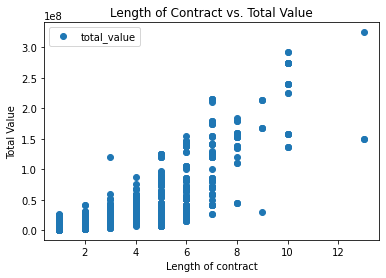

In [107]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

recent_salaries.plot(x = 'length', y='total_value',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Length of Contract vs. Total Value')  
plt.xlabel('Length of contract')  
plt.ylabel('Total Value')  
plt.show()

### NumPys Array

In [116]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X3 = recent_salaries['length'].values.reshape(-1,1)
y3 = recent_salaries['total_value'].values.reshape(-1,1)

### 2 Datasets: training and test

In [117]:
# Split data into a training set and a test set.

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=0)

### Regression Analysis

In [118]:
# Create a regression object.

regression_3 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [119]:
# Fit the regression object onto the training set.

regression_3.fit(X3_train, y3_train)

LinearRegression()

In [120]:
# Predict the values of y1 using X1.

y3_predicted = regression.predict(X3_test)

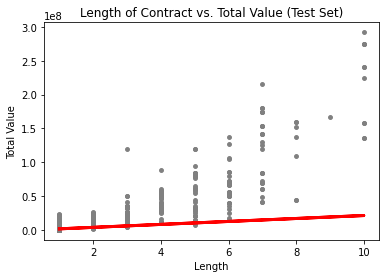

In [121]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X3_test, y3_test, color='gray', s = 15)
plot_test.plot(X3_test, y3_predicted, color='red', linewidth =3)
plot_test.title('Length of Contract vs. Total Value (Test Set)')
plot_test.xlabel('Length')
plot_test.ylabel('Total Value')
plot_test.show()

In [122]:
# Create objects that contain the model summary statistics.

rmse_3 = mean_squared_error(y3_test, y3_predicted) # This is the mean squared error
r2_3 = r2_score(y3_test, y3_predicted) # This is the R2 score. 

In [123]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression_3.coef_)
print('Mean squared error: ', rmse_3)
print('R2 score: ', r2_3)

Slope: [[16192859.92086524]]
Mean squared error:  504959134236189.3
R2 score:  0.13865529453744796


## Results:
Same results, however, the MSE is much higher and the R2 is a bit lower. Changing data to only have the most recent (from 2006 - 2016) didn't make that much of a difference.

# Exporting Datasets

In [124]:
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'salaries_Task64.csv'))